In [36]:
import pandas as pd
import datetime as dt
import numpy as np
import pytz
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis


In [52]:
df = pd.read_csv(r"C:\Guvi_project\taxi_fare.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

In [54]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [55]:
df.duplicated().sum()

0

In [56]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [57]:
df['VendorID'].unique()

array([1, 2], dtype=int64)

In [58]:
df.shape

(212345, 18)

In [59]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80


In [60]:


# Haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in kilometers (6371). For miles, use 3956.
    km = 6371 * c
    return km

# Apply to your DataFrame
df["trip_distance"] = haversine_distance(
    df["pickup_latitude"], df["pickup_longitude"],
    df["dropoff_latitude"], df["dropoff_longitude"]
)

# Quick check
print(df[["pickup_latitude", "pickup_longitude", 
          "dropoff_latitude", "dropoff_longitude", 
          "trip_distance"]].head())


   pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude  \
0        40.765152        -73.976746         40.746128         -74.004265   
1        40.767925        -73.983482         40.733166         -74.005943   
2        40.644810        -73.782021         40.675770         -73.974541   
3        40.769814        -73.863419         40.757767         -73.969650   
4        40.792183        -73.971741         40.695053         -74.177170   

   trip_distance  
0       3.138096  
1       4.303331  
2      16.600142  
3       9.046547  
4      20.400022  


In [63]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_datetime_local,dropoff_datetime_local
0,1,2016-03-01 00:00:00+00:00,2016-03-01 00:07:55+00:00,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.138096,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00
1,1,2016-03-01 00:00:00+00:00,2016-03-01 00:11:06+00:00,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.303331,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00
2,2,2016-03-01 00:00:00+00:00,2016-03-01 00:31:06+00:00,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.600142,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00
3,2,2016-03-01 00:00:00+00:00,2016-03-01 00:00:00+00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.046547,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00
4,2,2016-03-01 00:00:00+00:00,2016-03-01 00:00:00+00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.400022,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00


In [ ]:

# Ensure pickup datetime is in datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], utc=True)
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"], utc=True)

# Convert UTC → America/New_York (handles EDT/EST automatically with daylight savings)
df["pickup_datetime_local"] = df["tpep_pickup_datetime"].dt.tz_convert("America/New_York")
df["dropoff_datetime_local"] = df["tpep_dropoff_datetime"].dt.tz_convert("America/New_York")

# Quick check
print(df[["tpep_pickup_datetime", "pickup_datetime_local"]].head())

       tpep_pickup_datetime     pickup_datetime_local
0 2016-03-01 00:00:00+00:00 2016-02-29 19:00:00-05:00
1 2016-03-01 00:00:00+00:00 2016-02-29 19:00:00-05:00
2 2016-03-01 00:00:00+00:00 2016-02-29 19:00:00-05:00
3 2016-03-01 00:00:00+00:00 2016-02-29 19:00:00-05:00
4 2016-03-01 00:00:00+00:00 2016-02-29 19:00:00-05:00


In [65]:
df['trip_duration'] = (df['dropoff_datetime_local']-df['pickup_datetime_local']).dt.total_seconds() / 60

In [67]:
# Ensure pickup datetime is in datetime format
df["pickup_datetime_local"] = pd.to_datetime(df["pickup_datetime_local"])

# Extract weekday (0=Monday, 6=Sunday)
df["pickup_weekday"] = df["pickup_datetime_local"].dt.weekday

# Map to weekday/weekend
df["pickup_day_type"] = df["pickup_weekday"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

# Quick check
print(df[["tpep_pickup_datetime", "pickup_weekday", "pickup_day_type"]].head())


       tpep_pickup_datetime  pickup_weekday pickup_day_type
0 2016-03-01 00:00:00+00:00               0         Weekday
1 2016-03-01 00:00:00+00:00               0         Weekday
2 2016-03-01 00:00:00+00:00               0         Weekday
3 2016-03-01 00:00:00+00:00               0         Weekday
4 2016-03-01 00:00:00+00:00               0         Weekday


In [68]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_datetime_local,dropoff_datetime_local,trip_duration,pickup_weekday,pickup_day_type
0,1,2016-03-01 00:00:00+00:00,2016-03-01 00:07:55+00:00,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,2.05,0.00,0.3,12.35,3.138096,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,7.916667,0,Weekday
1,1,2016-03-01 00:00:00+00:00,2016-03-01 00:11:06+00:00,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,3.05,0.00,0.3,15.35,4.303331,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,11.100000,0,Weekday
2,2,2016-03-01 00:00:00+00:00,2016-03-01 00:31:06+00:00,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,8.00,0.00,0.3,63.80,16.600142,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,31.100000,0,Weekday
3,2,2016-03-01 00:00:00+00:00,2016-03-01 00:00:00+00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,3.78,5.54,0.3,41.62,9.046547,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,0.000000,0,Weekday
4,2,2016-03-01 00:00:00+00:00,2016-03-01 00:00:00+00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.00,15.50,0.3,113.80,20.400022,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,0.000000,0,Weekday


In [69]:
# Ensure pickup datetime is in datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Extract hour
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

# Create AM/PM column
df["pickup_am_pm"] = df["pickup_hour"].apply(lambda x: "AM" if x < 12 else "PM")

# Quick check
print(df[["tpep_pickup_datetime", "pickup_hour", "pickup_am_pm"]].head())


       tpep_pickup_datetime  pickup_hour pickup_am_pm
0 2016-03-01 00:00:00+00:00            0           AM
1 2016-03-01 00:00:00+00:00            0           AM
2 2016-03-01 00:00:00+00:00            0           AM
3 2016-03-01 00:00:00+00:00            0           AM
4 2016-03-01 00:00:00+00:00            0           AM


In [70]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,improvement_surcharge,total_amount,trip_distance,pickup_datetime_local,dropoff_datetime_local,trip_duration,pickup_weekday,pickup_day_type,pickup_hour,pickup_am_pm
0,1,2016-03-01 00:00:00+00:00,2016-03-01 00:07:55+00:00,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,0.3,12.35,3.138096,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,7.916667,0,Weekday,0,AM
1,1,2016-03-01 00:00:00+00:00,2016-03-01 00:11:06+00:00,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,0.3,15.35,4.303331,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,11.100000,0,Weekday,0,AM
2,2,2016-03-01 00:00:00+00:00,2016-03-01 00:31:06+00:00,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,0.3,63.80,16.600142,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,31.100000,0,Weekday,0,AM
3,2,2016-03-01 00:00:00+00:00,2016-03-01 00:00:00+00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,0.3,41.62,9.046547,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,0.000000,0,Weekday,0,AM
4,2,2016-03-01 00:00:00+00:00,2016-03-01 00:00:00+00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.3,113.80,20.400022,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,0.000000,0,Weekday,0,AM


In [ ]:
# Ensure pickup datetime is in datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Extract hour
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

# Create binary flag for night trips (10 PM - 5 AM)
df["is_night"] = df["pickup_hour"].apply(lambda x: 1 if (h >= 22 or h < 5) else 0)

# Quick check
print(df[["tpep_pickup_datetime", "pickup_hour", "is_night"]].head(10))


  tpep_pickup_datetime  pickup_hour  is_night
0  2016-03-01 00:00:00            0         1
1  2016-03-01 00:00:00            0         1
2  2016-03-01 00:00:00            0         1
3  2016-03-01 00:00:00            0         1
4  2016-03-01 00:00:00            0         1
5  2016-03-01 00:00:00            0         1
6  2016-03-01 00:00:00            0         1
7  2016-03-01 00:00:01            0         1
8  2016-03-01 00:00:01            0         1
9  2016-03-01 00:00:01            0         1


In [74]:
df.head()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,...,improvement_surcharge,total_amount,trip_distance,pickup_datetime_local,dropoff_datetime_local,trip_duration,pickup_weekday,pickup_day_type,pickup_hour,pickup_am_pm
0,1,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,...,0.3,12.35,3.138096,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,7.916667,0,Weekday,0,AM
1,1,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,...,0.3,15.35,4.303331,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,11.100000,0,Weekday,0,AM
2,2,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,...,0.3,63.80,16.600142,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,31.100000,0,Weekday,0,AM
3,2,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,...,0.3,41.62,9.046547,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,0.000000,0,Weekday,0,AM
4,2,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,...,0.3,113.80,20.400022,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,0.000000,0,Weekday,0,AM


In [73]:
#Drop the original datetime columns
df = df.drop(columns=["tpep_pickup_datetime", "tpep_dropoff_datetime"])

print(df.head())

   VendorID  passenger_count  pickup_longitude  pickup_latitude  RatecodeID  \
0         1                1        -73.976746        40.765152           1   
1         1                1        -73.983482        40.767925           1   
2         2                2        -73.782021        40.644810           1   
3         2                3        -73.863419        40.769814           1   
4         2                5        -73.971741        40.792183           3   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -74.004265         40.746128             1   
1                  N         -74.005943         40.733166             1   
2                  N         -73.974541         40.675770             1   
3                  N         -73.969650         40.757767             1   
4                  N         -74.177170         40.695053             1   

   fare_amount  ...  improvement_surcharge  total_amount  trip_distance  \

In [80]:
pd.set_option("display.max_columns", None)

In [81]:
df

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_datetime_local,dropoff_datetime_local,trip_duration,pickup_weekday,pickup_day_type,pickup_hour,pickup_am_pm
0,1,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.138096,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,7.916667,0,Weekday,0,AM
1,1,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.303331,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,11.100000,0,Weekday,0,AM
2,2,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.600142,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,31.100000,0,Weekday,0,AM
3,2,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.046547,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,0.000000,0,Weekday,0,AM
4,2,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.400022,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,0.000000,0,Weekday,0,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16,3.806279,2016-03-01 07:15:37-05:00,2016-03-01 07:38:53-05:00,23.266667,1,Weekday,12,PM
212341,2,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30,3.496576,2016-03-01 07:15:37-05:00,2016-03-01 07:38:22-05:00,22.750000,1,Weekday,12,PM
212342,2,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80,0.580119,2016-03-01 07:15:37-05:00,2016-03-01 07:18:18-05:00,2.683333,1,Weekday,12,PM
212343,1,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80,1.555737,2016-03-01 07:15:38-05:00,2016-03-01 07:22:47-05:00,7.150000,1,Weekday,12,PM


In [76]:
for i in df.select_dtypes(include='object').columns:
    print(i)

store_and_fwd_flag
pickup_day_type
pickup_am_pm


In [77]:
df['pickup_am_pm'].unique()

array(['AM', 'PM'], dtype=object)

In [79]:
df['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

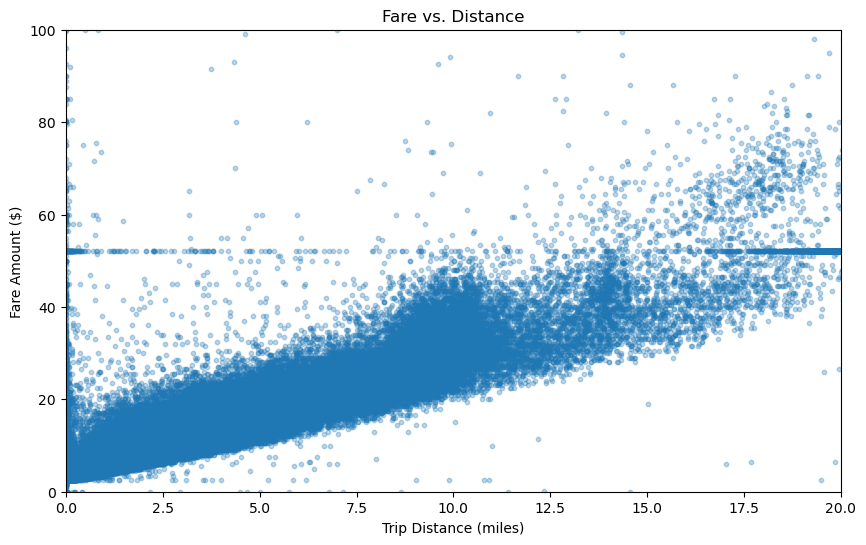

In [82]:

plt.figure(figsize=(10,6))
plt.scatter(df["trip_distance"], df["fare_amount"], alpha=0.3, s=10)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Fare vs. Distance")
plt.ylim(0,100)   # optional: limit extreme outliers
plt.xlim(0,20)    # optional: focus on reasonable trips
plt.show()


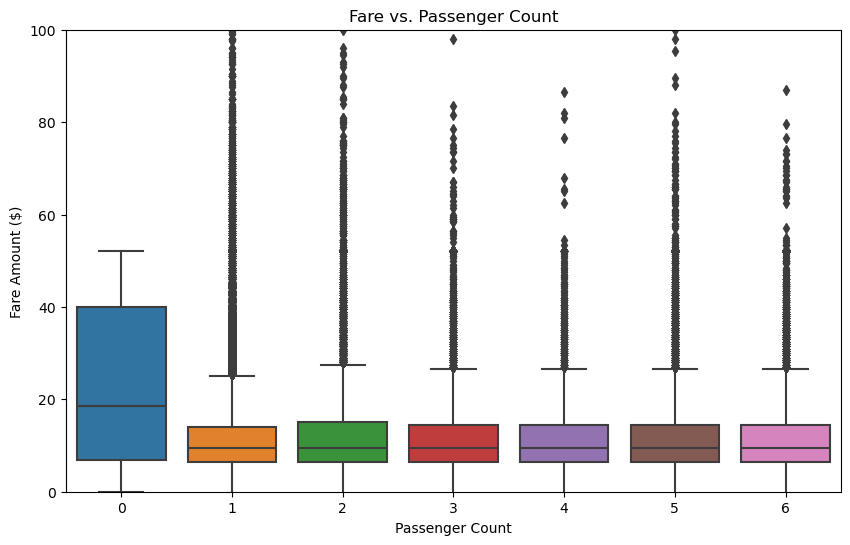

In [83]:


plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="passenger_count", y="fare_amount")
plt.ylim(0,100)   # ignore extreme outliers
plt.title("Fare vs. Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.show()


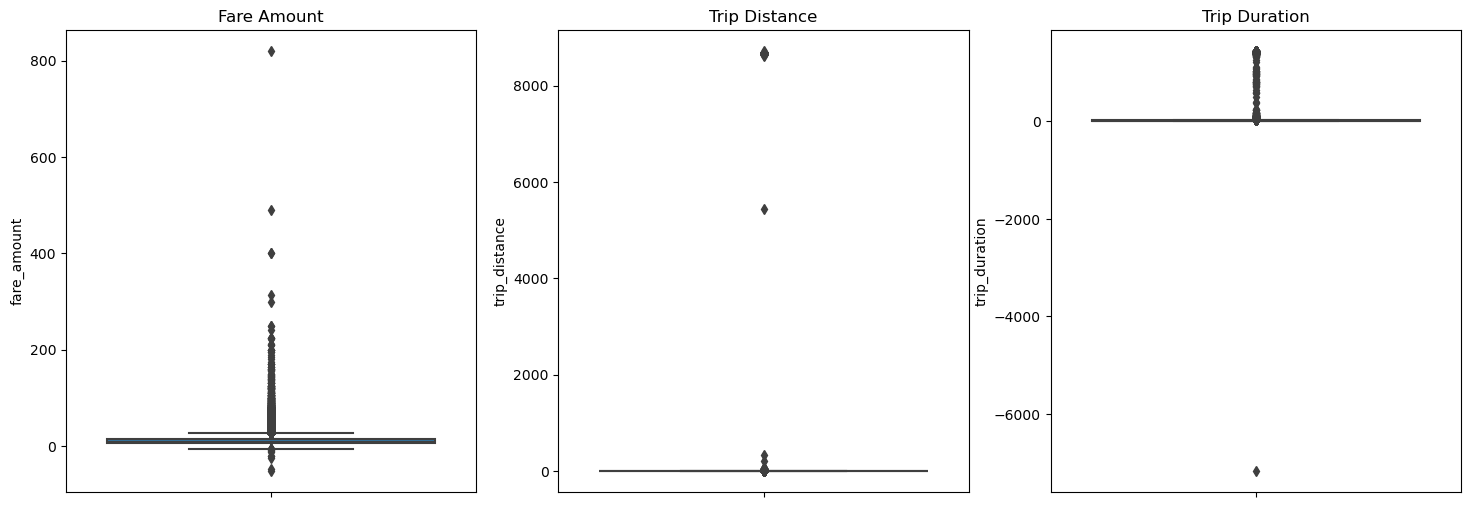

In [87]:

fig, axes = plt.subplots(1, 3, figsize=(18,6))

sns.boxplot(y=df["fare_amount"], ax=axes[0])
axes[0].set_title("Fare Amount")

sns.boxplot(y=df["trip_distance"], ax=axes[1])
axes[1].set_title("Trip Distance")

sns.boxplot(y=df["trip_duration"], ax=axes[2])
axes[2].set_title("Trip Duration")

plt.show()


<Axes: title={'center': 'Average Fare by Day of Week'}, xlabel='pickup_day_type'>

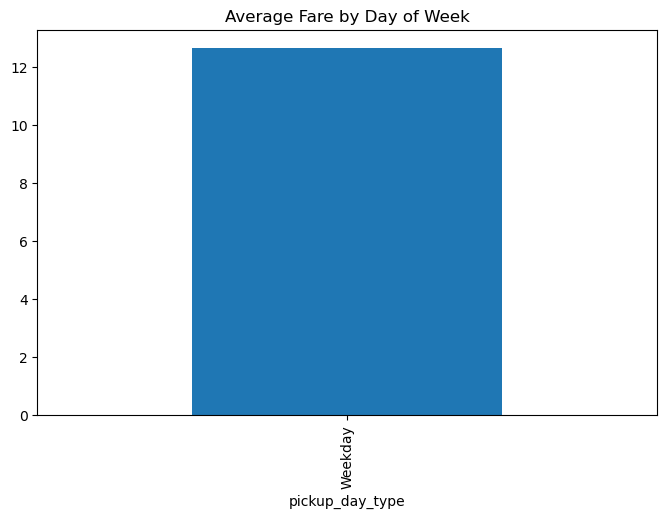

In [89]:
df.groupby("pickup_day_type")["fare_amount"].mean().plot(kind="bar", figsize=(8,5), title="Average Fare by Day of Week")


<Axes: title={'center': 'Average Fare by Hour'}, xlabel='pickup_hour'>

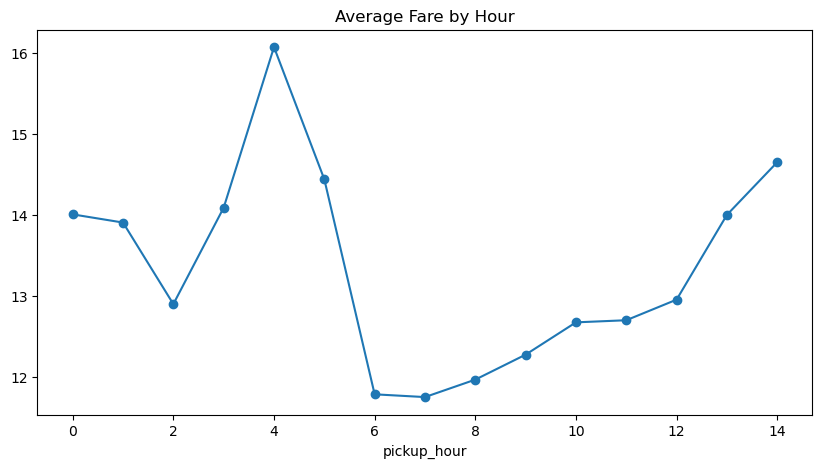

In [90]:
df.groupby("pickup_hour")["fare_amount"].mean().plot(kind="line", figsize=(10,5), marker="o", title="Average Fare by Hour")


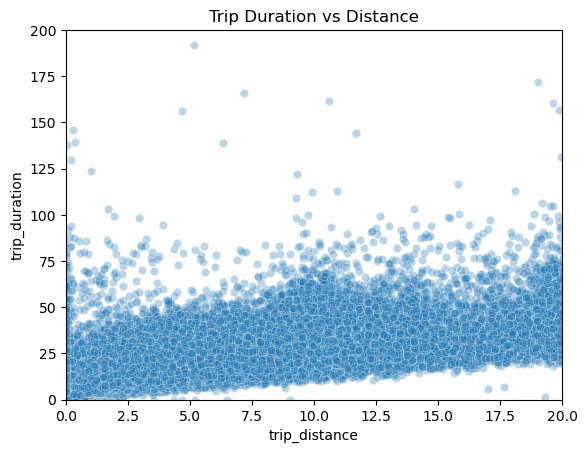

In [92]:
sns.scatterplot(data=df, x="trip_distance", y="trip_duration", alpha=0.3)
plt.xlim(0,20); plt.ylim(0,200)   # cap to avoid extreme outliers
plt.title("Trip Duration vs Distance")
plt.show()


<Axes: title={'center': 'Average Fare by Passenger Count'}, xlabel='passenger_count'>

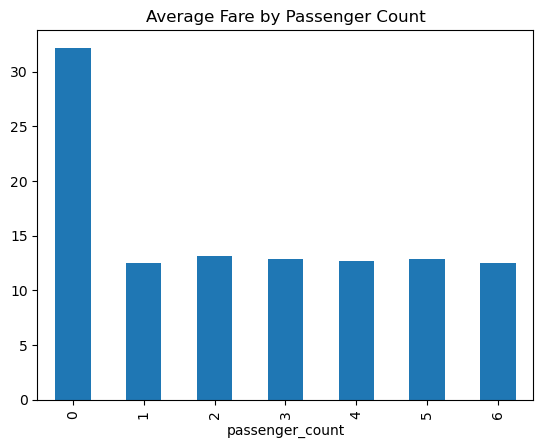

In [93]:
df.groupby("passenger_count")["fare_amount"].mean().plot(kind="bar", title="Average Fare by Passenger Count")

c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


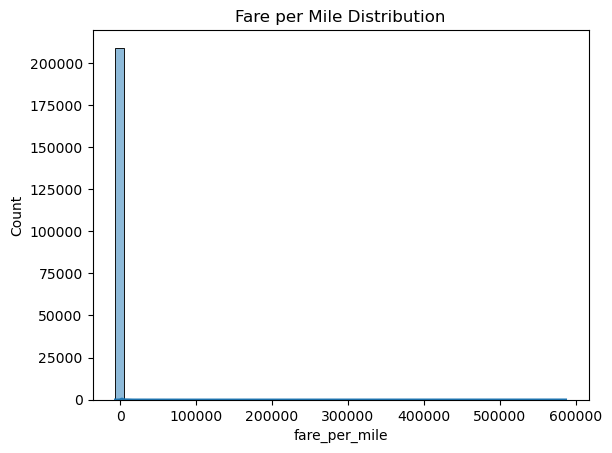

In [95]:
df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"]
sns.histplot(df["fare_per_mile"], bins=50, kde=True)
plt.title("Fare per Mile Distribution")
plt.show()


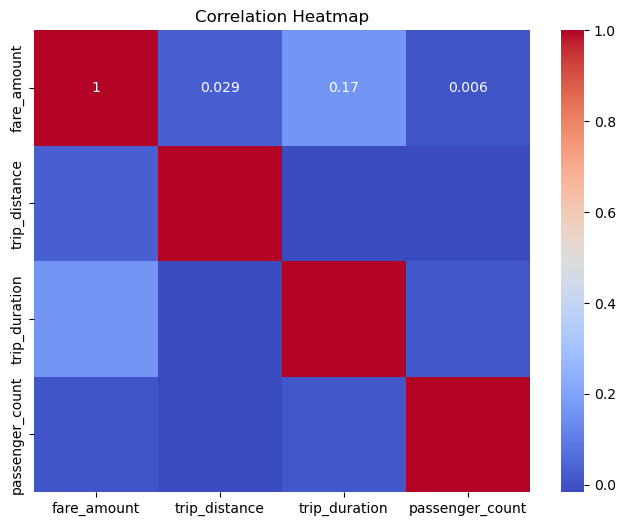

In [96]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["fare_amount","trip_distance","trip_duration","passenger_count"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


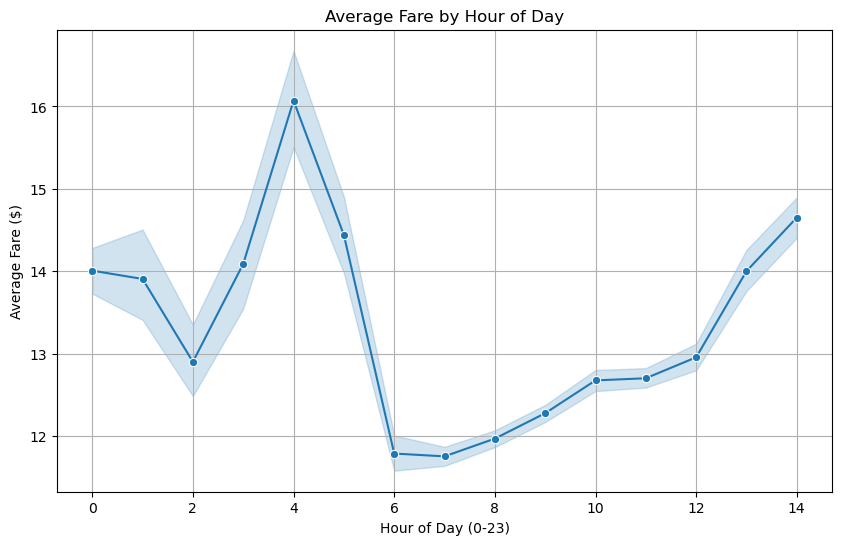

In [97]:

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="pickup_hour", y="fare_amount", estimator="mean", marker="o")
plt.title("Average Fare by Hour of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.show()


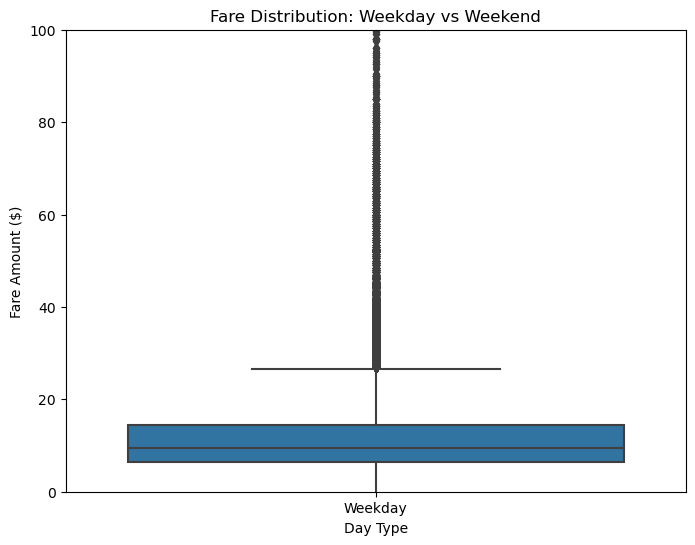

In [98]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="pickup_day_type", y="fare_amount")
plt.ylim(0,100)  # ignore extreme outliers
plt.title("Fare Distribution: Weekday vs Weekend")
plt.xlabel("Day Type")
plt.ylabel("Fare Amount ($)")
plt.show()


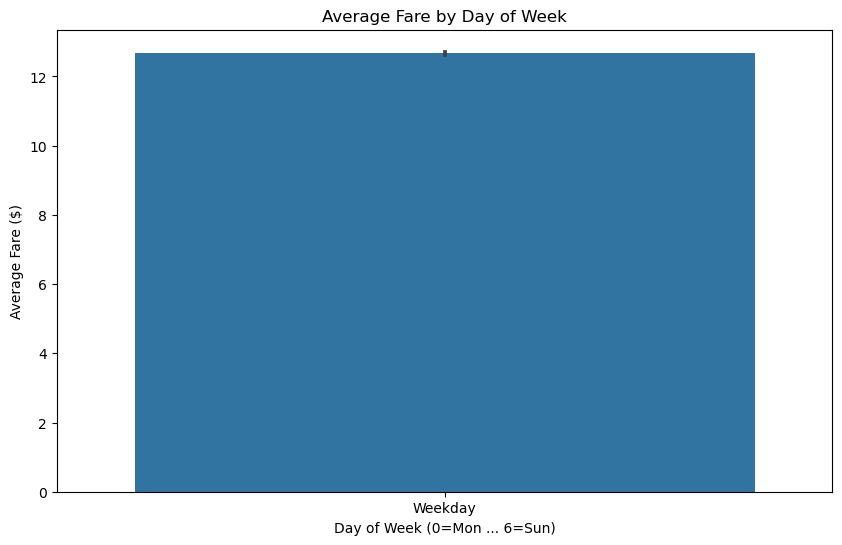

In [100]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="pickup_day_type", y="fare_amount", estimator="mean")
plt.title("Average Fare by Day of Week")
plt.xlabel("Day of Week (0=Mon ... 6=Sun)")
plt.ylabel("Average Fare ($)")
plt.show()


In [37]:
df

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,trip_distance_km,pickup_weekday,pickup_day_type,pickup_am_pm,is_night,pickup_datetime_local,dropoff_datetime_local,fare_per_mile
0,1,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,2016,3,1,0,0,2016,3,1,0,7,3.138096,1,Weekday,AM,1,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,2.867981
1,1,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,2016,3,1,0,0,2016,3,1,0,11,4.303331,1,Weekday,AM,1,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,2.556159
2,2,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,2016,3,1,0,0,2016,3,1,0,31,16.600142,1,Weekday,AM,1,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,3.283104
3,2,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,2016,3,1,0,0,2016,3,1,0,0,9.046547,1,Weekday,AM,1,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,3.481991
4,2,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,2016,3,1,0,0,2016,3,1,0,0,20.400022,1,Weekday,AM,1,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,4.803916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16,2016,3,1,12,15,2016,3,1,12,38,3.806279,1,Weekday,PM,0,2016-03-01 07:15:37-05:00,2016-03-01 07:38:53-05:00,4.203580
212341,2,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30,2016,3,1,12,15,2016,3,1,12,38,3.496576,1,Weekday,PM,0,2016-03-01 07:15:37-05:00,2016-03-01 07:38:22-05:00,4.432908
212342,2,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80,2016,3,1,12,15,2016,3,1,12,18,0.580119,1,Weekday,PM,0,2016-03-01 07:15:37-05:00,2016-03-01 07:18:18-05:00,6.895134
212343,1,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80,2016,3,1,12,15,2016,3,1,12,22,1.555737,1,Weekday,PM,0,2016-03-01 07:15:38-05:00,2016-03-01 07:22:47-05:00,4.499476


In [104]:


# Select numeric columns for outlier detection
num_cols = ["fare_amount", "trip_distance","trip_duration"]

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[num_cols]))

# Filter rows where all Z-scores < 3
df_z = df[(z_scores < 3).all(axis=1)]

print("Original shape:", df.shape)
print("After Z-score filtering:", df_z.shape)




Original shape: (212345, 25)
After Z-score filtering: (205664, 25)


c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


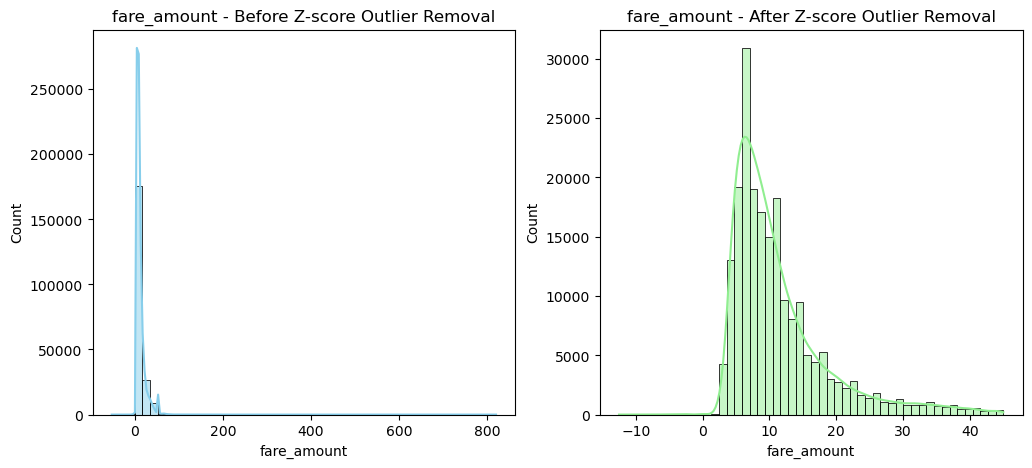

c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


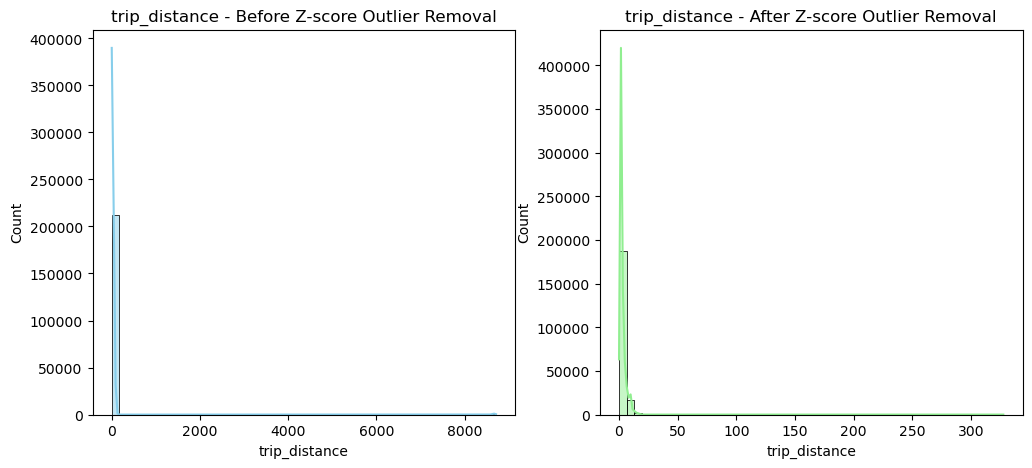

c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


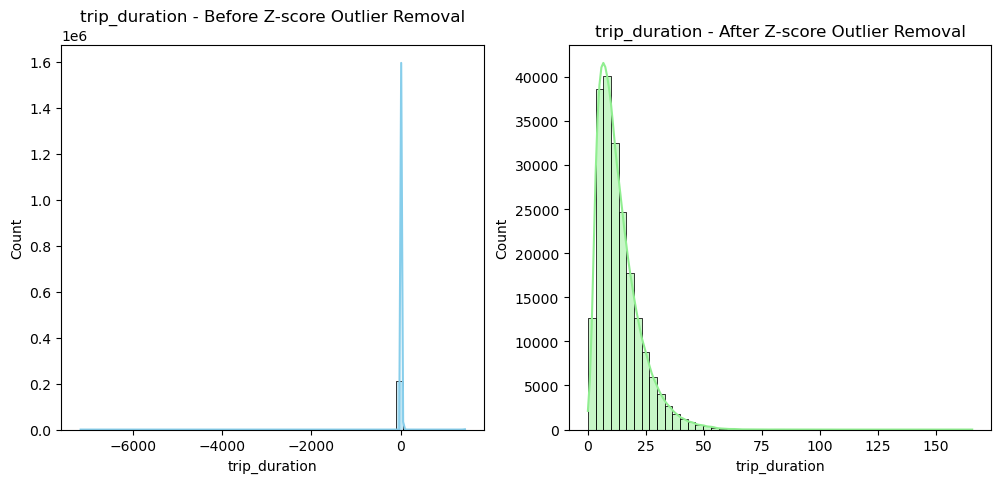

In [106]:
cols = ["fare_amount", "trip_distance","trip_duration"]

for col in cols:
    plt.figure(figsize=(12,5))

    # Before outlier removal
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=50, kde=True, color="skyblue")
    plt.title(f"{col} - Before Z-score Outlier Removal")

    # After outlier removal
    plt.subplot(1,2,2)
    sns.histplot(df_z[col], bins=50, kde=True, color="lightgreen")
    plt.title(f"{col} - After Z-score Outlier Removal")

    plt.show()


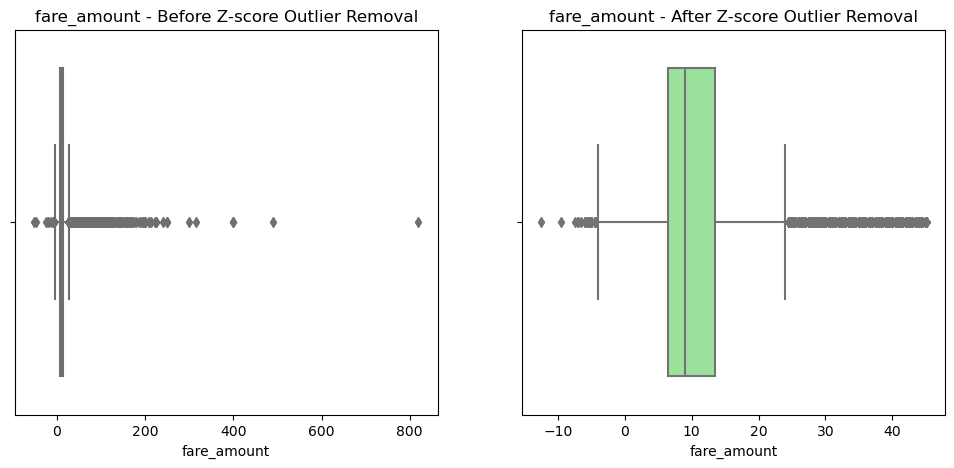

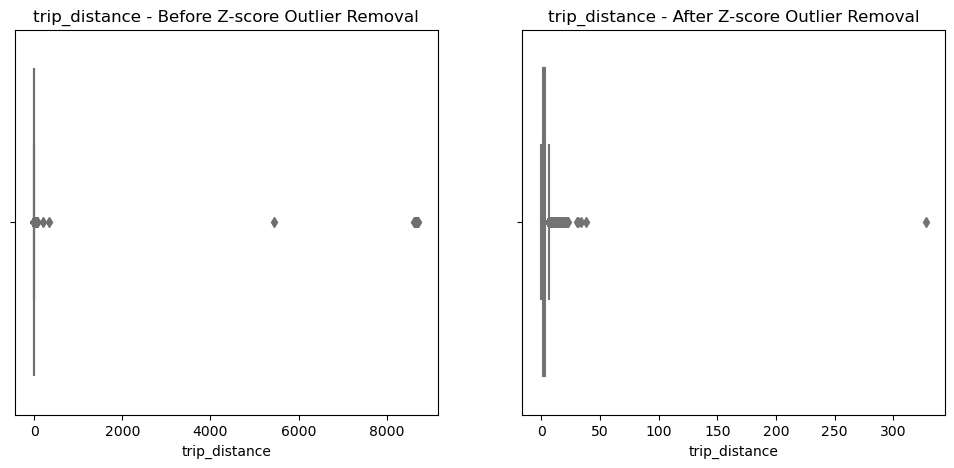

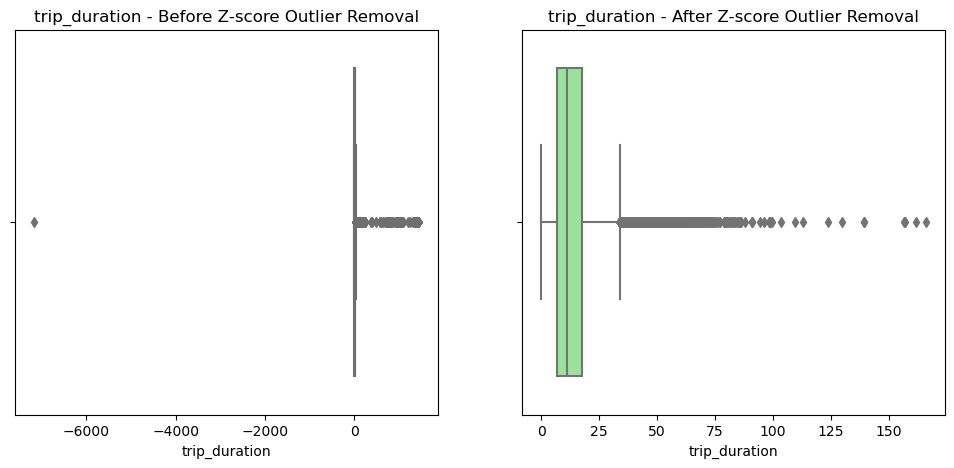

In [107]:
for col in cols:
    plt.figure(figsize=(12,5))

    # Before
    plt.subplot(1,2,1)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"{col} - Before Z-score Outlier Removal")

    # After
    plt.subplot(1,2,2)
    sns.boxplot(x=df_z[col], color="lightgreen")
    plt.title(f"{col} - After Z-score Outlier Removal")

    plt.show()


In [108]:
from scipy.stats import skew

cols = ["fare_amount", "trip_distance","trip_duration"]

for col in cols:
    print(f"{col} skewness: {skew(df_z[col])}")


fare_amount skewness: 1.8444541482484516
trip_distance skewness: 10.485638859863215
trip_duration skewness: 1.6234529634183812


In [109]:
from scipy.stats import kurtosis

cols = ["fare_amount", "trip_distance","trip_duration"]

for col in cols:
    print(f"{col} kurtosis: {kurtosis(df_z[col])}")

fare_amount kurtosis: 3.7173679242019535
trip_distance kurtosis: 1030.4945522597202
trip_duration kurtosis: 5.317884340520857


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype                           
---  ------                  --------------   -----                           
 0   VendorID                212345 non-null  int64                           
 1   passenger_count         212345 non-null  int64                           
 2   pickup_longitude        212345 non-null  float64                         
 3   pickup_latitude         212345 non-null  float64                         
 4   RatecodeID              212345 non-null  int64                           
 5   store_and_fwd_flag      212345 non-null  object                          
 6   dropoff_longitude       212345 non-null  float64                         
 7   dropoff_latitude        212345 non-null  float64                         
 8   payment_type            212345 non-null  int64                           
 9   fare_amount    

In [43]:
df['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [44]:
df.columns

Index(['VendorID', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour',
       'pickup_minute', 'dropoff_year', 'dropoff_month', 'dropoff_day',
       'dropoff_hour', 'dropoff_minute', 'trip_distance_km', 'pickup_weekday',
       'pickup_day_type', 'pickup_am_pm', 'is_night', 'pickup_datetime_local',
       'dropoff_datetime_local', 'fare_per_mile'],
      dtype='object')

In [49]:
df['pickup_day_type'].unique()

array(['Weekday'], dtype=object)

In [111]:
import numpy as np
import pandas as pd
from scipy.stats import skew, boxcox,kurtosis
from sklearn.preprocessing import PowerTransformer

def fix_skewness(df, cols, threshold=0.5):
    """
    Fix skewness in continuous variables using best transformation.
    
    Params:
        df (pd.DataFrame): DataFrame
        cols (list): list of continuous columns
        threshold (float): acceptable skewness level after transformation
        
    Returns:
        df_transformed (pd.DataFrame), report (pd.DataFrame)
    """
    report = []
    pt = PowerTransformer(method='yeo-johnson')
    
    for col in cols:
        data = df[col].dropna()
        best_col = None
        best_skew = abs(skew(data))
        best_transform = "None"
        transformed = data
        
        # --- Try transformations ---
        transformations = {
            "log": lambda x: np.log1p(x) if (x>=0).all() else None,
            "sqrt": lambda x: np.sqrt(x) if (x>=0).all() else None,
            "cbrt": lambda x: np.cbrt(x),
            "boxcox": lambda x: boxcox(x + 1e-6)[0] if (x>0).all() else None,
            "yeojohnson": lambda x: pt.fit_transform(x.values.reshape(-1,1)).flatten()
        }
        
        for name, func in transformations.items():
            try:
                temp = func(data)
                if temp is not None:
                    new_skew = abs(skew(temp))
                    if new_skew < best_skew:
                        best_skew = new_skew
                        best_transform = name
                        transformed = temp
            except:
                continue
        
        # Save transformed column
        new_col = f"{col}_{best_transform}"
        df[new_col] = transformed
        
        # Report
        report.append({
            "column": col,
            "original_skew": round(abs(skew(data)), 3),
            "best_transform": best_transform,
            "best_skew": round(best_skew, 3)
        })
        
		        # --- Plot before vs after ---
        fig, axes = plt.subplots(1, 2, figsize=(12,4))
        
        sns.histplot(data, kde=True, ax=axes[0])
        axes[0].set_title(f"{col} (Before) Skew={round(skew(data),2)}")
        
        sns.histplot(transformed, kde=True, ax=axes[1])
        axes[1].set_title(f"{col} ({best_transform}) Skew={round(best_skew,2)}")
        
        plt.show()
    
    return df, pd.DataFrame(report)


c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


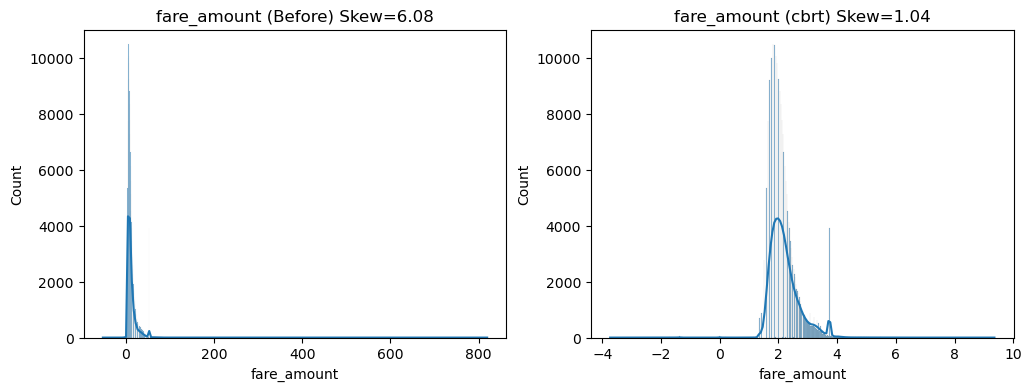

c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


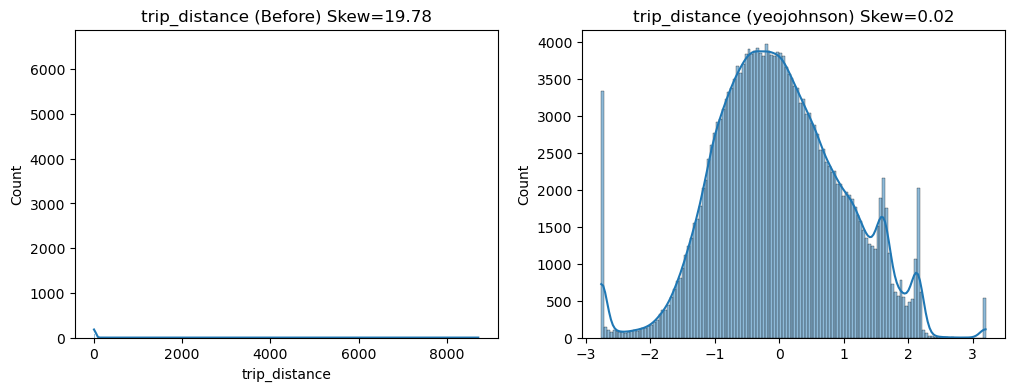

c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


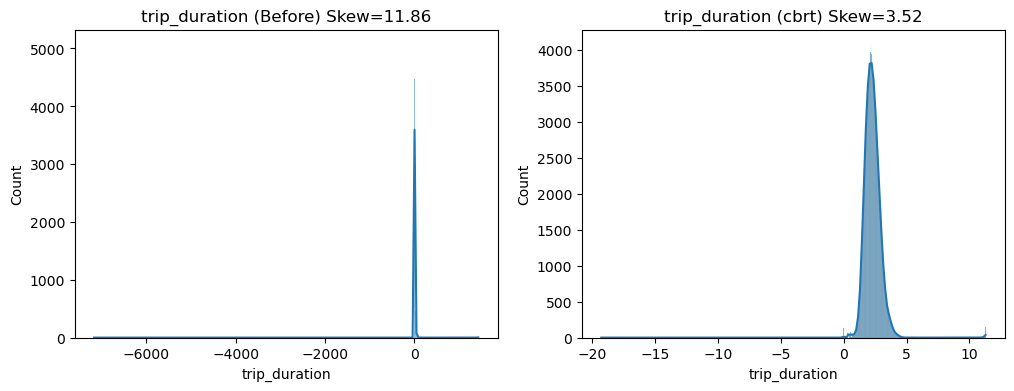

          column  original_skew best_transform  best_skew
0    fare_amount          6.078           cbrt      1.044
1  trip_distance         19.776     yeojohnson      0.017
2  trip_duration         11.860           cbrt      3.520


In [112]:
cols_to_fix = ['fare_amount', 'trip_distance','trip_duration']

df_transformed, skew_report = fix_skewness(df, cols_to_fix)

print(skew_report)

In [120]:
df["total_amount"].skew()

5.271133904774768

In [121]:
df["total_amount"].kurtosis()

122.64056313921567

In [138]:
df['pickup_datetime_local'] = pd.to_datetime(df['pickup_datetime_local'])

# Extract features
df['pickup_hour']   = df['pickup_datetime_local'].dt.hour
df['pickup_day']    = df['pickup_datetime_local'].dt.day_name()
df['is_weekend']    = df['pickup_datetime_local'].dt.dayofweek >= 5  # Sat=5, Sun=6
df['pickup_month']  = df['pickup_datetime_local'].dt.month_name()


c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


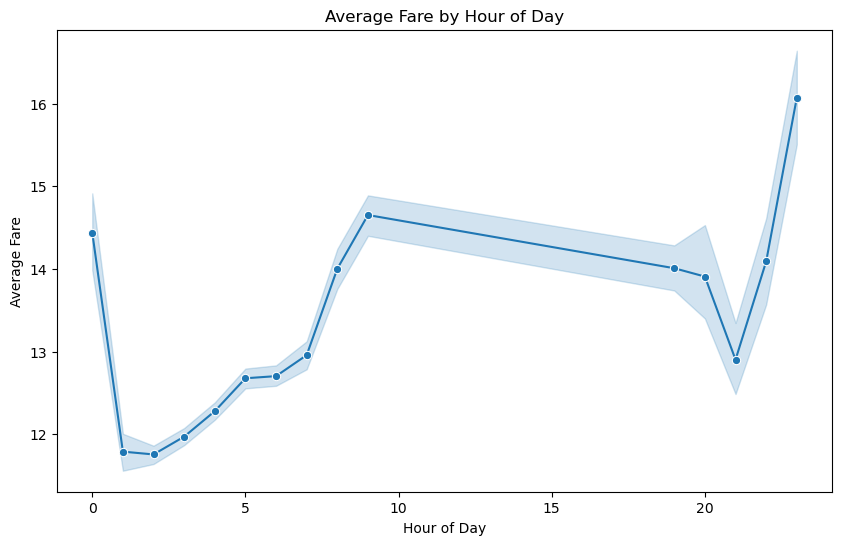

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="pickup_hour", y="fare_amount", estimator="mean", marker="o")
plt.title("Average Fare by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare")
plt.show()


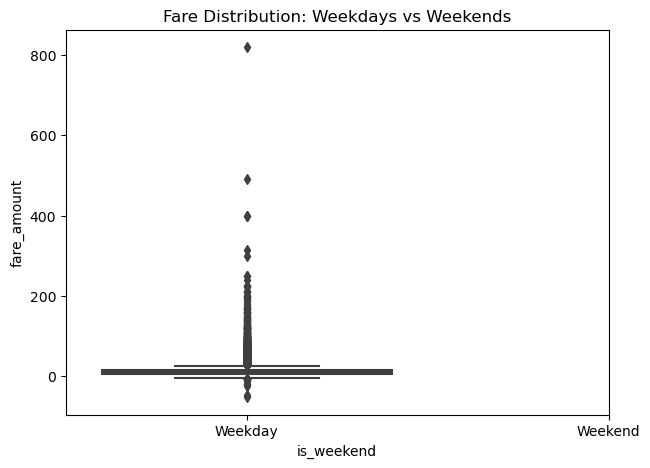

In [140]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="is_weekend", y="fare_amount")
plt.xticks([0,1], ["Weekday", "Weekend"])
plt.title("Fare Distribution: Weekdays vs Weekends")
plt.show()


c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


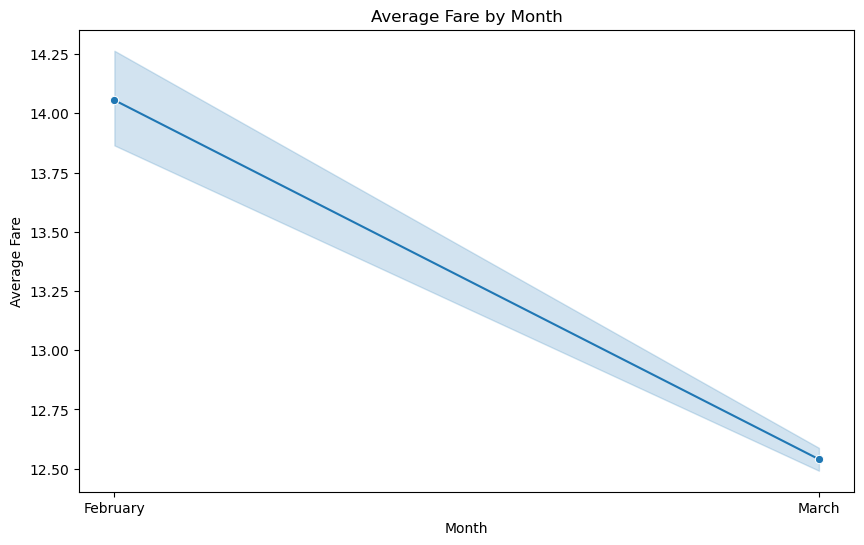

In [141]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="pickup_month", y="fare_amount", estimator="mean", marker="o")
plt.title("Average Fare by Month")
plt.xlabel("Month")
plt.ylabel("Average Fare")
plt.show()


c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\WELCOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


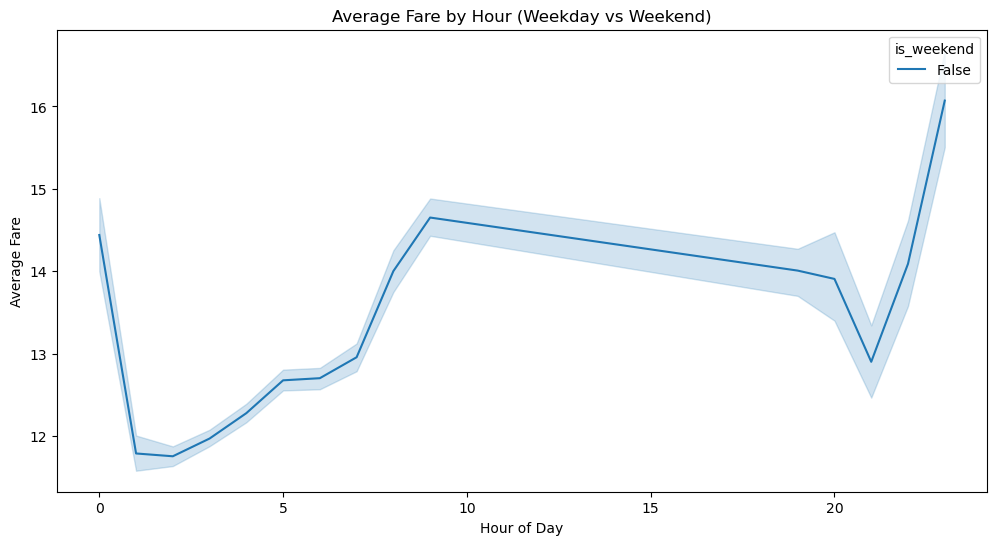

In [142]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="pickup_hour", y="fare_amount", hue="is_weekend", estimator="mean")
plt.title("Average Fare by Hour (Weekday vs Weekend)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare")
plt.show()


In [148]:
df.head()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_datetime_local,dropoff_datetime_local,trip_duration,pickup_weekday,pickup_day_type,pickup_hour,pickup_am_pm,fare_per_mile,fare_amount_cbrt,trip_distance_yeojohnson,trip_duration_cbrt,pickup_day,is_weekend,pickup_month
0,1,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.138096,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,7.916667,0,Weekday,19,AM,2.867981,2.080084,0.514666,1.993031,Monday,False,February
1,1,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.303331,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,11.100000,0,Weekday,19,AM,2.556159,2.223980,0.865589,2.230699,Monday,False,February
2,2,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.600142,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,31.100000,0,Weekday,19,AM,3.283104,3.791393,2.020916,3.144755,Monday,False,February
3,2,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.046547,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,0.000000,0,Weekday,19,AM,3.481991,3.158180,1.575152,0.000000,Monday,False,February
4,2,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.400022,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,0.000000,0,Weekday,19,AM,4.803916,4.610436,2.146457,0.000000,Monday,False,February


In [147]:
df.shape

(212345, 31)

In [146]:
cols = df.select_dtypes(include= ['int64','float64']).columns
print(cols)

Index(['VendorID', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'RatecodeID', 'dropoff_longitude', 'dropoff_latitude', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_distance',
       'trip_duration', 'fare_per_mile', 'fare_amount_cbrt',
       'trip_distance_yeojohnson', 'trip_duration_cbrt'],
      dtype='object')


In [150]:
df = df.drop(columns=["trip_duration", "trip_distance","fare_amount"])
df

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_datetime_local,dropoff_datetime_local,pickup_weekday,pickup_day_type,pickup_hour,pickup_am_pm,fare_per_mile,fare_amount_cbrt,trip_distance_yeojohnson,trip_duration_cbrt,pickup_day,is_weekend,pickup_month
0,1,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,0.5,0.5,2.05,0.00,0.3,12.35,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,0,Weekday,19,AM,2.867981,2.080084,0.514666,1.993031,Monday,False,February
1,1,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,0.5,0.5,3.05,0.00,0.3,15.35,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,0,Weekday,19,AM,2.556159,2.223980,0.865589,2.230699,Monday,False,February
2,2,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,0.5,0.5,8.00,0.00,0.3,63.80,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,0,Weekday,19,AM,3.283104,3.791393,2.020916,3.144755,Monday,False,February
3,2,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,0.0,0.5,3.78,5.54,0.3,41.62,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,0,Weekday,19,AM,3.481991,3.158180,1.575152,0.000000,Monday,False,February
4,2,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,0.0,0.0,0.00,15.50,0.3,113.80,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,0,Weekday,19,AM,4.803916,4.610436,2.146457,0.000000,Monday,False,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,0.0,0.5,3.36,0.00,0.3,20.16,2016-03-01 07:15:37-05:00,2016-03-01 07:38:53-05:00,1,Weekday,7,PM,4.203580,2.519842,0.732146,2.854816,Tuesday,False,March
212341,2,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,0.0,0.5,2.00,0.00,0.3,18.30,2016-03-01 07:15:37-05:00,2016-03-01 07:38:22-05:00,1,Weekday,7,PM,4.432908,2.493315,0.637601,2.833526,Tuesday,False,March
212342,2,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,0.0,0.5,0.00,0.00,0.3,4.80,2016-03-01 07:15:37-05:00,2016-03-01 07:18:18-05:00,1,Weekday,7,PM,6.895134,1.587401,-1.412483,1.389606,Tuesday,False,March
212343,1,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,0.0,0.5,0.00,0.00,0.3,7.80,2016-03-01 07:15:38-05:00,2016-03-01 07:22:47-05:00,1,Weekday,7,PM,4.499476,1.912931,-0.321929,1.926499,Tuesday,False,March


In [151]:
df.columns

Index(['VendorID', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'pickup_datetime_local', 'dropoff_datetime_local', 'pickup_weekday',
       'pickup_day_type', 'pickup_hour', 'pickup_am_pm', 'fare_per_mile',
       'fare_amount_cbrt', 'trip_distance_yeojohnson', 'trip_duration_cbrt',
       'pickup_day', 'is_weekend', 'pickup_month'],
      dtype='object')

In [149]:
for col, dtype in df.dtypes.items():
    if dtype == "object":
        print(col)

store_and_fwd_flag
pickup_day_type
pickup_am_pm
pickup_day
pickup_month


In [152]:
df.rename(columns={"pickup_datetime_local" : "pickupday","dropoff_datetime_local" : "dropoff_day","fare_amount_cbrt" : "fare_amount","trip_distance_yeojohnson" : "trip_distance",
                   "trip_duration_cbrt" : "trip_duration"}, inplace= True)

In [156]:
df.to_csv('Tirpfare.csv', index=False)

In [1]:
!pip install pymysql

In [2]:
import pymysql

In [3]:
DB_CONFIG = {
    "host": "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    "user": "1D3T6mastHsd7CC.root",
    "password": "7ncL5uHvveksrFsb", # Your database password from the notebook
    "port": 4000,
    "ssl_ca": r"C:\Guvi_project\isrgrootx1.pem"
}
conn = pymysql.connect(**DB_CONFIG)
cursor = conn.cursor()

In [13]:
cursor.execute("create database if not exists nutrition ")

0

In [ ]:
DB_CONFIG = {
    "host": "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    "user": "1D3T6mastHsd7CC.root",
    "password": "W8WMaCTTjC9jmy08", # Your database password from the notebook
    "port": 4000,
    "database": "near_earth_objects",
    "ssl_ca": "C:\Guvi_project\isrgrootx1.pem"
}

In [8]:
import sqlite3
conn = sqlite3.connect("nutrition.db")
cursor = conn.cursor()